# LendingClub Dataset
**Dataset Description：**
The dataset contains the homeloan records released from Lending Club. The problem lenders care is that whether a borrower can repay homeloan and interest on time. In addition, the homeloan interest rate is highly related with the loan credit of borrowers. A borrower with a higher credit can easily get homeloan with a lower rate. The task of the project is to predict whehter a borrower can replay homeloan and interest on time based on a number of features of the borrower. This is a typical classification problem and this notebook demonstrate how to use Lending Club dataset to decide whether a homeloan case should be approved based a borrower' features. 

**Dataset Detail Information*
The dataset contains 9,578 recrds in total. Every record has 13 features and 1 label which are described as below. 
* credit.policy: This is the label. Its value is 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

* purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", “home_improvement” and "all_other").

* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

* installment: The monthly installments owed by the borrower if the loan is funded.

* log.annual.inc: The natural log of the self-reported annual income of the borrower.

* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

* fico: The FICO credit score of the borrower.Common FICO scores range from 300 to 850,with higher scores indicating better credit.

* days.with.cr.line: The number of days the borrower has had a credit line.

* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments

* not.fully.paid：Whether the borrower will be fully paid or not.

**Learning taks:**
1. Data should be preprocessed and cleaned. 
2. Feature selection should be conducted to remove irrelevant features.
3. Train a logistic regression model to predict "credit.policy" by using the other 13 features.
4. The logistic regression model should be evaluated with cross validation by using 5-10 folds.  

## Import Packages

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Dataset and Clean Dataset

The purpose of this part is to guarantee the data used in the notebook is reliable. 。

In [79]:
Data = pd.read_csv('./data/loan_data.csv')
Data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,NaN
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0


In [80]:
Data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,NaN
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,-0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1.0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1.0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1.0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1.0


After loading the dataset into the notebook, we can further check basic information of the dataset such as data type. 

In [81]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9577 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.0+ MB


According to the displayed dataset information, we can conclude that
1. The dataset is complete without missing any record. 
2. There are 13 features and 1 label. There are three possible datatypes, which are loat64,int64 and object
There are seven data types which are：credit_card, debt_consolidation, educational, major_purchase, small_business, home_improvement 和all_other。 Note that the type of purpose is object, which cannot be analyzed directly. This feature will be converted by OneHotEncoder or OrdinalEncoder.

Now, we can proveed to check basic statistical information of these features such as mean values, standard deviation, maximum and minimum values, etc. 

## Based on Data info, please clean the dataset by removing abnormal data points or filling in missing values.  

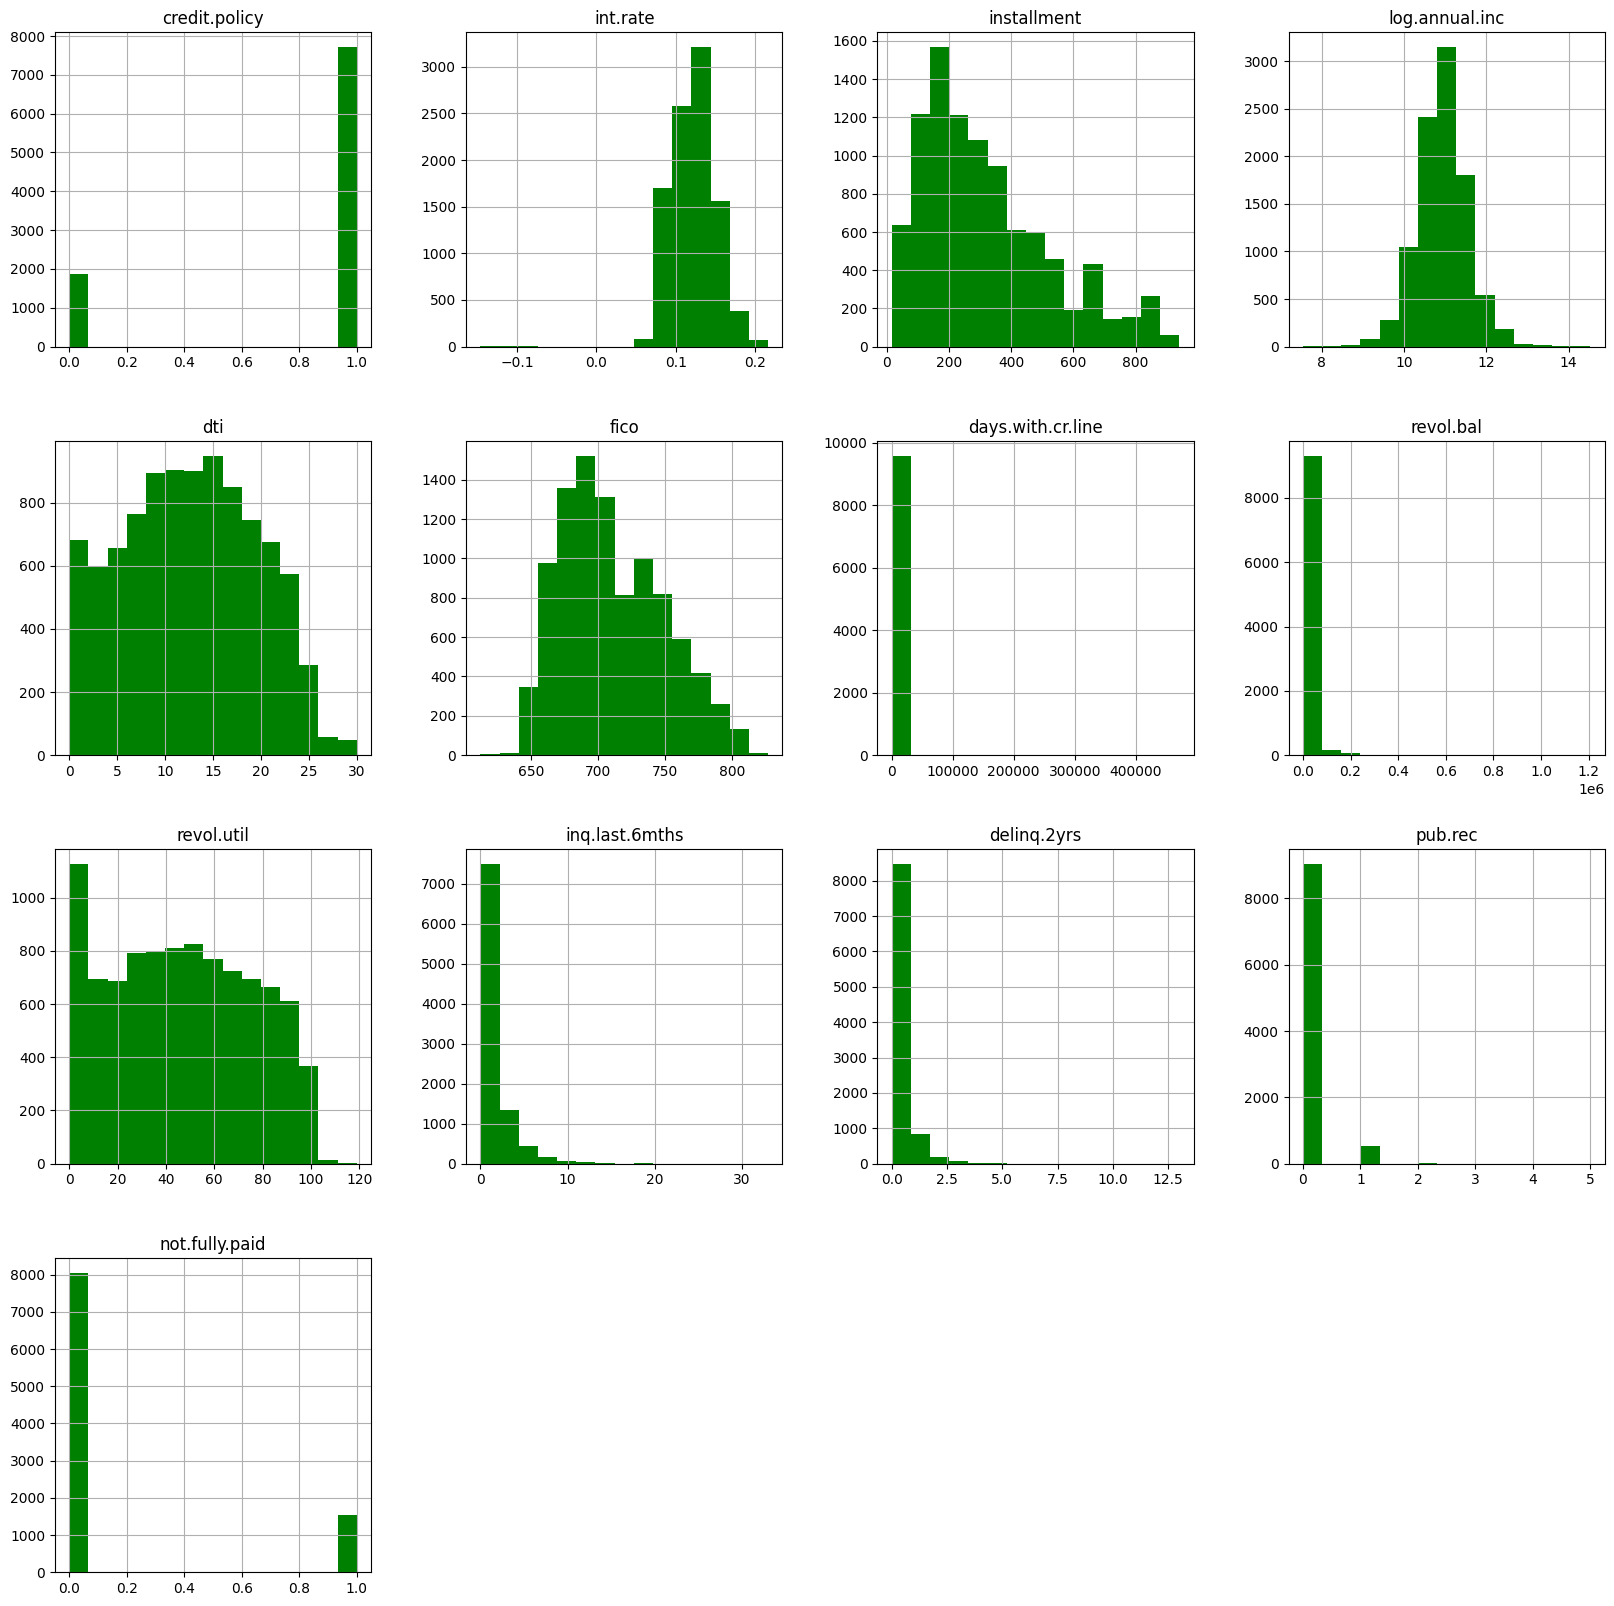

In [82]:
Data.hist(bins=15 ,figsize=(20,20), color = 'Green')
plt.show()

In [83]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122570,0.027163,-0.146100,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4609.450638,5380.501367,178.958333,2820.000000,4139.958333,5730.000000,4.710000e+05
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


Step 1 : Removing missing values

since there isno more than one missing value in the data set and it has a binary value i just drop the row

In [84]:
df = Data.dropna(inplace = False).copy()

In [85]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,-0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1.0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1.0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1.0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1.0


Step 2 : removing the abnormal data points (outliers)

we remove any data point outside the interquartile range to remove the outliers

In [86]:
dff = pd.DataFrame(columns=df.columns)
for col in df.columns:
    if (col != 'purpose'):
        q1 = df[col].quantile(0.25) # 1st quartile
        q3 = df[col].quantile(0.75) # 3rd quartile
        iqr = q3 - q1 # Interquartile range
        upperBound = q3 + 1.5 * iqr
        lowerBound = q1 - 1.5 * iqr 
        dff = df[(df[col] >= lowerBound) & (df[col] <= upperBound)]
df = dff.copy()
df



,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,0,all_other,0.0788,115.74,10.999095,10.17,722,4410.000000,11586,61.6,4,0,0,0.0
9562,0,debt_consolidation,0.1348,508.87,10.933107,17.76,717,3870.041667,8760,28.2,6,0,0,0.0
9564,0,all_other,0.1385,511.56,12.323856,12.33,687,6420.041667,385489,51.2,4,0,0,0.0
9567,0,all_other,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0.0


Step 3: removing negative values from the int.rate since it isn't logical to have negative intrest rates 

In [87]:
df = df[df["int.rate"] >= 0]

In [88]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,0,all_other,0.0788,115.74,10.999095,10.17,722,4410.000000,11586,61.6,4,0,0,0.0
9562,0,debt_consolidation,0.1348,508.87,10.933107,17.76,717,3870.041667,8760,28.2,6,0,0,0.0
9564,0,all_other,0.1385,511.56,12.323856,12.33,687,6420.041667,385489,51.2,4,0,0,0.0
9567,0,all_other,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0.0


In [89]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,8042.0,0.832256,0.373662,0.000000,1.000000,1.000000,1.000000,1.000000
int.rate,8042.0,0.120777,0.026692,0.060000,0.099600,0.121800,0.138700,0.212100
installment,8042.0,314.554361,203.334855,15.670000,162.252500,266.520000,423.782500,940.140000
log.annual.inc,8042.0,10.940939,0.604105,7.547502,10.584056,10.933178,11.303991,14.528354
dti,8042.0,12.494146,6.854816,0.000000,7.120000,12.530000,17.800000,29.950000
fico,8042.0,713.320567,38.222744,612.000000,682.000000,707.000000,742.000000,827.000000
days.with.cr.line,8042.0,4650.430547,5774.275870,178.958333,2820.041667,4140.041667,5760.031250,471000.000000
revol.bal,8042.0,16115.258145,29636.675929,0.000000,3168.750000,8531.000000,17901.500000,952013.000000
revol.util,8042.0,45.761633,28.894844,0.000000,21.400000,44.800000,69.800000,119.000000
inq.last.6mths,8042.0,1.434220,1.999307,0.000000,0.000000,1.000000,2.000000,31.000000


## From data feature distributions, please discuss whether we should normalise these features. 

based on the histograms each representing a column it can be said their distribution is non-normal and the data needs to be normalised, another reason that we need to normalise this data is because the scale of each column varies by far from the one next to it, This can result in certain features dominating the model during the training process, leading to biased model performance. so yes we should normalise the data. normalisation is not a must for logistic regression model but i still do it.

## Data Analytics and Classification

Now, our target is to train a logistic regression model to predict 'credit.policy' with 13 features. This is a typical classification problem. 
## It is unnecessary to use all 13 features as input of the logistic regression model. To select relevant features, we can plot the heatmap between two features to filter relevant features as our input. 

From the heatmaps, we can find different correlations between each feature and 'credit.policy'. 
We only reserve features that have positive correlations with 'credit.policy' by removing features with a low correlation with credit_policy.

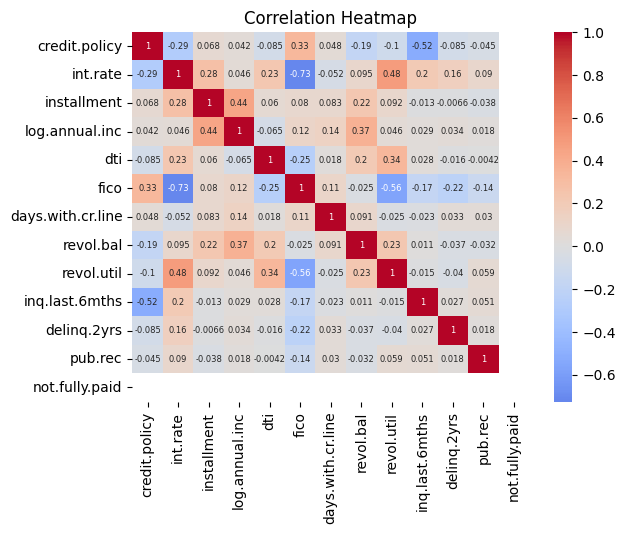

In [90]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0 , annot_kws={"size": 6})
plt.title("Correlation Heatmap")
plt.show()


the above code demonstrates the correlation of different features with credit.policy.

## Data Preprocess

### Process of Object data type

The logistic regression model cannot well process the object data type. We convert this data type with OneHotEncoder such that this feature can be handled by the logistic regression model. 

In [91]:
# we can use either OrdinalEncoder or OneHotEncoder

In [92]:
# from sklearn.preprocessing import OrdinalEncoder

In [93]:
# encoder = OrdinalEncoder()
# encoder.fit(df[['purpose']])
# df['purpose'] = encoder.transform(df[['purpose']])



In [94]:
# New_Data = df


In [95]:
# I am going to use OneHotEncoder since it is the given method to convertion

this code convert all the values of purpose into numerical values and we can use it to train our model

In [96]:
dummy_purpose = pd.get_dummies(df['purpose'])
dummy_purpose.head() # OneHotEncoder 
New_Data = pd.concat((df.iloc[:,0], dummy_purpose, df.iloc[:,2:]), axis=1)
New_Data.head()

,credit.policy,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,0,1,0,0,0,0,0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,0,0,1,0,0,0,0,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,0,0,1,0,0,0,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,0,1,0,0,0,0,0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0
5,1,0,1,0,0,0,0,0,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0.0


In [97]:
dummy_purpose

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
9561,1,0,0,0,0,0,0
9562,0,0,1,0,0,0,0
9564,1,0,0,0,0,0,0
9567,1,0,0,0,0,0,0


In [98]:
New_Data

,credit.policy,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,0,1,0,0,0,0,0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,0,0,1,0,0,0,0,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,0,0,1,0,0,0,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,0,1,0,0,0,0,0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0
5,1,0,1,0,0,0,0,0,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,0,1,0,0,0,0,0,0,0.0788,115.74,10.999095,10.17,722,4410.000000,11586,61.6,4,0,0,0.0
9562,0,0,0,1,0,0,0,0,0.1348,508.87,10.933107,17.76,717,3870.041667,8760,28.2,6,0,0,0.0
9564,0,1,0,0,0,0,0,0,0.1385,511.56,12.323856,12.33,687,6420.041667,385489,51.2,4,0,0,0.0
9567,0,1,0,0,0,0,0,0,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0.0


In [99]:
# at this stage we have concatenated the converted purpose columns to the original dataset for the model to proccess them

### Dataset classification
We classify all data records into training set (80%), validation set (10%)  and test set (10%) so that we can determine hyper-parameters with k-cross validation. 

Sort all records by an ascending order of 'credit.policy'. and select the first 90% as the training and validation sets. The rest 10% will be used as the test set. 

In [100]:
from sklearn.model_selection import train_test_split
print(New_Data['credit.policy'].value_counts())


1    6693
0    1349
Name: credit.policy, dtype: int64


We complete dataset classification as below. 

In [101]:
x_ex1 = New_Data.copy().drop(columns=['credit.policy','pub.rec','dti','delinq.2yrs','inq.last.6mths','revol.util','revol.bal','int.rate'])
y_ex1 = New_Data.copy()['credit.policy']
x_ex1_array = x_ex1.values
y_ex1_array = y_ex1.values
# x_ex1_train = x_ex1_array[0:int((len(y_ex1_array)+1)*0.9),:]
# x_ex1_test = x_ex1_array[int((len(y_ex1_array)+1)*0.9):,:]
# x_ex1_val = x_ex1_array[int((len(y_ex1_array)+1)*0.8):int((len(y_ex1_array)+1)*0.9),:]
# y_ex1_train = y_ex1_array[0:int((len(y_ex1_array)+1)*0.9)]
# y_ex1_test = y_ex1_array[int((len(y_ex1_array)+1)*0.9):]
# y_ex1_val = y_ex1_array[int((len(y_ex1_array)+1)*0.8):int((len(y_ex1_array)+1)*0.9)]

i have provided the way to extract the validation set from the dataset in your way too, so i show this is also doable but not the best way to do it, because you are selecting the manually and its not ideal.

here i split the data into training and validation set and testing set 90% is for training and validation and the rest is for the testing dataset.

In [102]:
x_ex1_train, x_ex1_test, y_ex1_train, y_ex1_test   = train_test_split(x_ex1,y_ex1, train_size=0.9, random_state=42)
X_train, x_ex1_val, y_train, y_ex1_val = train_test_split(x_ex1_train, y_ex1_train, test_size=0.1111)

### Data normalisation

## Recall that we have observed large value discrepancies between these features. It is necessary to normalise these features before we use them to train our models.  Here, we emply standardization method to normalise our dataset as below. 

In [103]:
from sklearn.preprocessing import StandardScaler

here i normalised the data using the standard scaler whihc was needed because the data was not normally distributed and the scale of values in each column was very differently from another.

In [104]:
scaler = StandardScaler()
x_ex1_train = scaler.fit_transform(x_ex1_train)
x_ex1_test = scaler.transform(x_ex1_test)
x_ex1_val = scaler.transform(x_ex1_val)


In [105]:
x_ex1_train

array([[ 1.77004712, -0.40088115, -0.84890352, ...,  0.09691574,
        -0.3038124 ,  0.        ],
       [-0.56495671, -0.40088115,  1.17799017, ...,  0.88160251,
        -0.28393386,  0.        ],
       [-0.56495671, -0.40088115,  1.17799017, ...,  1.01238364,
         0.36731453,  0.        ],
       ...,
       [-0.56495671, -0.40088115,  1.17799017, ..., -0.68777103,
        -0.57227974,  0.        ],
       [-0.56495671, -0.40088115, -0.84890352, ..., -1.21089555,
        -0.6816428 ,  0.        ],
       [-0.56495671,  2.49450494, -0.84890352, ...,  0.35847799,
         0.1634887 ,  0.        ]])

In [106]:
x_ex1_test

array([[-5.64956710e-01, -4.00881147e-01,  1.17799017e+00, ...,
        -1.34167668e+00, -4.99352628e-01,  0.00000000e+00],
       [ 1.77004712e+00, -4.00881147e-01, -8.48903519e-01, ...,
         1.14316476e+00, -8.01080277e-02,  0.00000000e+00],
       [-5.64956710e-01,  2.49450494e+00, -8.48903519e-01, ...,
        -5.56989905e-01, -3.47898712e-01,  0.00000000e+00],
       ...,
       [-5.64956710e-01, -4.00881147e-01,  1.17799017e+00, ...,
        -8.18552161e-01, -5.73144833e-04,  0.00000000e+00],
       [ 1.77004712e+00, -4.00881147e-01, -8.48903519e-01, ...,
         7.50821379e-01, -1.94456252e-01,  0.00000000e+00],
       [-5.64956710e-01, -4.00881147e-01,  1.17799017e+00, ...,
         1.79707041e+00,  2.92550255e-02,  0.00000000e+00]])

In [107]:
x_ex1_val

array([[-0.56495671,  2.49450494, -0.84890352, ...,  0.09691574,
         0.51794679,  0.        ],
       [-0.56495671,  2.49450494, -0.84890352, ...,  0.62004025,
        -0.12964903,  0.        ],
       [-0.56495671, -0.40088115, -0.84890352, ..., -1.08011442,
        -0.31375512,  0.        ],
       ...,
       [-0.56495671, -0.40088115,  1.17799017, ..., -0.5569899 ,
         0.02926883,  0.        ],
       [-0.56495671, -0.40088115,  1.17799017, ...,  0.88160251,
         0.39217824,  0.        ],
       [ 1.77004712, -0.40088115, -0.84890352, ...,  1.53550815,
        -0.09502211,  0.        ]])

## Model Evaluation
In this stage, we are going to train a logistic regression model. Cross validation will be used to determine hyper-parameters and evaluate model performance.


### Logistic Regression Model

## Train a Logistic Regression Model with training dataset.

In [108]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()

In [109]:
model_log.fit(x_ex1_train,y_ex1_train)

LogisticRegression()

the code below performs the cross validation operation on the training dataset

In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_log, x_ex1_train, y_ex1_train, cv=9)
print("Cross-validation scores: ", scores)
print("Mean accuracy: ", scores.mean())

Cross-validation scores:  [0.84968944 0.85199005 0.85696517 0.85199005 0.85572139 0.84577114
 0.84701493 0.84825871 0.85572139]
Mean accuracy:  0.8514580307571872



## To better understand our result, we visualize the performance evluation by comparing the model accuracy of the Logistic Regression model on the training dataset and each validation dataset.

In [111]:
from sklearn.metrics import accuracy_score

accuracy of the model on the training dataset

In [112]:
y_pred = model_log.predict(x_ex1_train)

In [113]:
accuracy_score(y_ex1_train, y_pred)

0.8529777532126572

accuracy of the model on the testing dataset

In [114]:
y_pred_test = model_log.predict(x_ex1_test)

In [115]:
accuracy_score(y_ex1_test, y_pred_test)

0.8596273291925466

model performance on the valuation dataset

In [116]:
y_pred_val = model_log.predict(x_ex1_val)

In [117]:
accuracy_score(y_ex1_val, y_pred_val)

0.853416149068323

In [118]:
a = accuracy_score(y_ex1_train, y_pred)
a_test = accuracy_score(y_ex1_test, y_pred_test)
a_val = accuracy_score(y_ex1_val, y_pred_val)

<Axes: xlabel='datasets'>

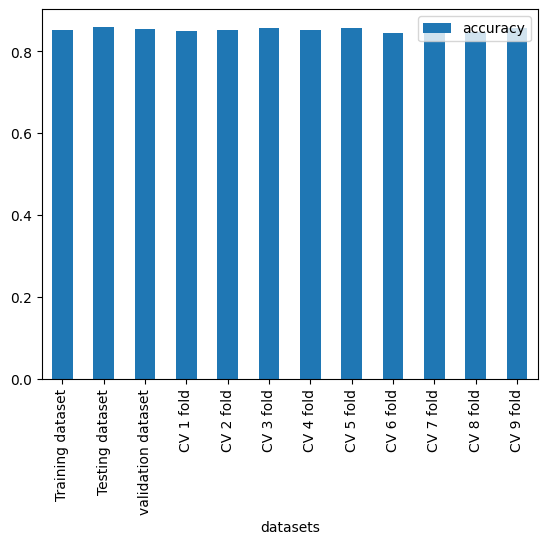

In [119]:
dataframe = {'datasets':['Training dataset','Testing dataset','validation dataset','CV 1 fold','CV 2 fold','CV 3 fold','CV 4 fold','CV 5 fold','CV 6 fold','CV 7 fold','CV 8 fold','CV 9 fold'], 'accuracy':[a,a_test,a_val,scores[0],scores[1],scores[2],scores[3],scores[4],scores[5],scores[6],scores[7],scores[8]]}
pl = pd.DataFrame(dataframe)
pl.plot(kind='bar', x = 'datasets', y='accuracy')

Overall the performance of the model could be boosted if we were allowed to use features with high negative correlation too. because no matter a positive or negative correlation they all end up changing the final outcome and if we could consider more features with high correlation it could boost the model performance.

From the visualised results, we can observe that the model prediction performance is very good. The accuracy on validation dataset is only slightly lower than the accuracy on the training dataset. This result is convincing since we have conducted 9 fold cross validation. Our cross validation indicates that we have obtained an accurate model. 

## Note that the test dataset is not used for evaluation. Since there is no hyperparameter in the Logistic Regression model, the cross-validation has reflected the performance of the model on unknown datasets. 